Import

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from math import comb

Daten

In [31]:
kartenfarben = ["grün"]*5 + ["gelb"]*3
münzenwurf = ["Kopf", "Zahl"]

#ereignisraum

Erstellung von Ergebnisraum, wenn mehrere Daten Ereignisse vorhanden, wenn nicht, schreibe bei daten ergebnisraum

In [32]:
# Ereignisraum generieren
ereignisraum = list(itertools.product(kartenfarben, münzenwurf))

print(ereignisraum)

[('grün', 'Kopf'), ('grün', 'Zahl'), ('grün', 'Kopf'), ('grün', 'Zahl'), ('grün', 'Kopf'), ('grün', 'Zahl'), ('grün', 'Kopf'), ('grün', 'Zahl'), ('grün', 'Kopf'), ('grün', 'Zahl'), ('gelb', 'Kopf'), ('gelb', 'Zahl'), ('gelb', 'Kopf'), ('gelb', 'Zahl'), ('gelb', 'Kopf'), ('gelb', 'Zahl')]


Wahrscheinlichkeiten berechnen
\begin{equation}
P(A) = \frac{Anz. Günstiger erreignisse}{Ergebnisraum}
\end{equation}

In [110]:
#filtere die günstigen ergebnisse, welche verlangt sind
filter_a = lambda ereignis: ereignis[0] in ["grün"] and ereignis[1] in ["Zahl"]
günstige_ereignisse = list(filter(filter_a, ereignisraum))
#Berechner der Wahrscheinlichkeit
p_a = len(günstige_ereignisse) / len(ereignisraum)
#ausgeben der Wahrscheinlichkeit in %
print(p_a * 100, "%")

31.25 %


\begin{equation}
\binom{n}{k}
\end{equation}

In [44]:
n = 52 #Die Anzahl der Versuche (oder Experimente),
k = 5 #Die Anzahl der Erfolge

berechnung = comb(n, k)
print(berechnung)

2598960


\begin{title}
Binominialverteilung
\end{title}
\begin{equation}
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
\end{equation}
\begin{title}Kumulatative Warscheinlichkeit\end{title}
\begin{equation}
P(X>=7)=1-\sum_{k=0}^6 P(X=k)
\end{equation}

In [108]:
# Parameter
n = 20 #anzahl versuche / total vorhanden
p = 0.5 #wahrscheinlichkeit für erfolg

# Wahrscheinlichkeit für X <= 6
p_x_le_6 = sum(comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in range(7))
print(p_x_le_6)
# Wahrscheinlichkeit für X >= 7
p_x_ge_7 = 1 - p_x_le_6

print(f"Wahrscheinlichkeit, dass die Münze mindestens 7 Mal auf Kopf landet:{p_x_ge_7 * 100:.2f}%")

0.057659149169921875
Wahrscheinlichkeit, dass die Münze mindestens 7 Mal auf Kopf landet:94.23%


Satz von Bayes **Bedingte Warscheinlichkeit**
\begin{equation}
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\end{equation}

In [74]:
# Gegebene Wahrscheinlichkeiten
P_A = 0.04  # Wahrscheinlichkeit, dass das Ereignis A wahr ist (z. B. gezinkter Würfel)
P_neg_A = 0.96  # Wahrscheinlichkeit, dass das Ereignis A nicht wahr ist (z. B. fairer Würfel)
P_B_given_A = 0.35  # Wahrscheinlichkeit, dass B eintritt, wenn A wahr ist (z. B. Wahrscheinlichkeit für eine 5 bei gezinktem Würfel)
P_B_given_neg_A = 1/6  # Wahrscheinlichkeit, dass B eintritt, wenn A nicht wahr ist (z. B. Wahrscheinlichkeit für eine 5 bei einem fairen Würfel)

# Funktion zur Berechnung von P(A|B) mit Bayes' Theorem
def bayes_theorem(n):
    # Berechnung der Wahrscheinlichkeit für n Wiederholungen von B bei A
    P_B_given_A_n = P_B_given_A**n
    
    # Berechnung der Wahrscheinlichkeit für n Wiederholungen von B bei ¬A
    P_B_given_neg_A_n = P_B_given_neg_A**n
    
    # Gesamtwahrscheinlichkeit für n Wiederholungen von B
    P_B = P_B_given_A_n * P_A + P_B_given_neg_A_n * P_neg_A
    
    # Bayes' Theorem anwenden
    P_A_given_B = (P_B_given_A_n * P_A) / P_B
    return P_A_given_B

# Eingabe der Anzahl der Wiederholungen
n = int(input("Geben Sie die Anzahl der Wiederholungen von B (z.B. 2 für zweimal hintereinander) ein: "))

# Berechnung der Wahrscheinlichkeit P(A|B)
P_A_given_B = bayes_theorem(n)

# Ausgabe der Wahrscheinlichkeit
print(f"Die Wahrscheinlichkeit, dass A wahr ist, nachdem {n} Wiederholungen von B beobachtet wurden, beträgt: {P_A_given_B * 100:.2f}%")


Die Wahrscheinlichkeit, dass A wahr ist, nachdem 5 Wiederholungen von B beobachtet wurden, beträgt: 62.99%


Satz von Bayes wenn die Wahrscheinlichkeit einer Bedingten Warscheinlichkeit grösser als einen **X%** sein soll
\begin{equation}
P(A|B) > X\%
\end{equation}

In [73]:
# Gegebene Wahrscheinlichkeiten
P_A = 0.04  # Beispielwert für P(A)
P_neg_A = 0.96  # Beispielwert für P(¬A)
P_B_given_A = 0.35  # Beispielwert für P(B|A)
P_B_given_neg_A = 1/6  # Beispielwert für P(B|¬A)

X = 0.08

# Funktion zur Berechnung von P(A|B) mit Bayes' Theorem
def bayes_theorem_von_hier(n):
    P_B_given_A_n = P_B_given_A**n  # Wahrscheinlichkeit für n Wiederholungen von B bei A
    P_B_given_neg_A_n = P_B_given_neg_A**n  # Wahrscheinlichkeit für n Wiederholungen von B bei ¬A
    
    # Gesamtwahrscheinlichkeit für n Wiederholungen von B
    P_B = P_B_given_A_n * P_A + P_B_given_neg_A_n * P_neg_A

    # Bayes' Theorem anwenden
    P_A_given_B = (P_B_given_A_n * P_A) / P_B
    return P_A_given_B

# Bestimmen der kleinsten Anzahl n, für die P(A|B) > 0.5
n = 1
while bayes_theorem_von_hier(n) <= X:
    n += 1

print(f"Nach {n} Wiederholungen von B ist die Wahrscheinlichkeit, dass A zutrifft, größer als {X*100}%.")


Nach 1 Wiederholungen von B ist die Wahrscheinlichkeit, dass A zutrifft, größer als 8.0%.


***Die Anzahl möglichkeiten berechnen (Kobinatorik)***

In [98]:
from Kombinatoriken import kombination_variation_permutation_
kombination_variation_permutation_()

120


In [106]:
P_A = float(input("Die Wahrscheinlichkeit in %, dass das Ereignis A wahr ist (z. B. gezinkter Würfel)"))/100  # Wahrscheinlichkeit, dass das Ereignis A wahr ist (z. B. gezinkter Würfel)
P_neg_A = float(input(" Die Wahrscheinlichkeit in %, dass das Ereignis A nicht wahr ist (z. B. fairer Würfel)"))/100  # Wahrscheinlichkeit, dass das Ereignis A nicht wahr ist (z. B. fairer Würfel)
P_B_given_A = float(input("Die Wahrscheinlichkeit in %, dass B eintritt, wenn A wahr ist (z. B. Wahrscheinlichkeit für eine 5 bei gezinktem Würfel)"))/100  # Wahrscheinlichkeit, dass B eintritt, wenn A wahr ist (z. B. Wahrscheinlichkeit für eine 5 bei gezinktem Würfel)
P_B_given_neg_A = float(input("Die Wahrscheinlichkeitin %, dass B eintritt, wenn A nicht wahr ist (z. B. Wahrscheinlichkeit für eine 5 bei einem fairen Würfel)"))/100  # Wahrscheinlichkeit, dass B eintritt, wenn A nicht wahr ist (z. B. Wahrscheinlichkeit für eine 5 bei einem fairen Würfel)

def bayes_theorem(n):
    # Berechnung der Wahrscheinlichkeit für n Wiederholungen von B bei A
    P_B_given_A_n = P_B_given_A ** n

    # Berechnung der Wahrscheinlichkeit für n Wiederholungen von B bei ¬A
    P_B_given_neg_A_n = P_B_given_neg_A ** n

    # Gesamtwahrscheinlichkeit für n Wiederholungen von B
    P_B = P_B_given_A_n * P_A + P_B_given_neg_A_n * P_neg_A

    # Bayes' Theorem anwenden
    P_A_given_B = (P_B_given_A_n * P_A) / P_B
    return P_A_given_B * 100

print(f"{bayes_theorem(5)}%")

63.033012056398206%


In [1]:
import random

1640


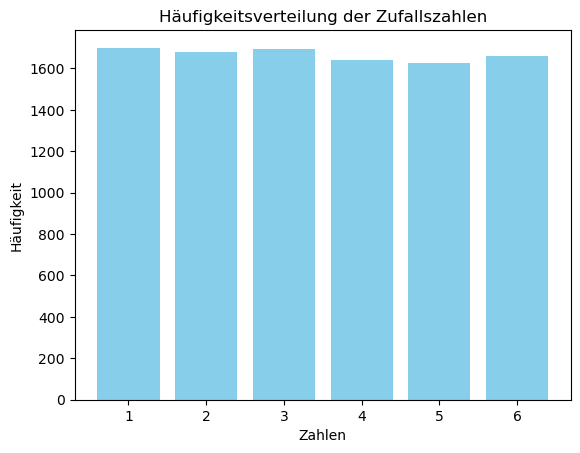

In [15]:
x = random.choices(range(1,7),k=10000)
count = x.count(4)
print(count)

counts = [x.count(i) for i in range(1, 7)]

# Erstelle ein Balkendiagramm
plt.bar(range(1, 7), counts, color='skyblue')
plt.xlabel('Zahlen')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeitsverteilung der Zufallszahlen')
plt.show()